## Tratamento da base

In [4]:
# Criar a base de dados que será utilizada para ajustar o modelo
import pandas as pd
df = pd.read_csv('tic-tac-toe.data')
print(df.shape)
df.head()

(957, 10)


,x,x.1,x.2,x.3,o,o.1,x.4,o.2,o.3,positive
0,x,x,x,x,o,o,o,x,o,positive
1,x,x,x,x,o,o,o,o,x,positive
2,x,x,x,x,o,o,o,b,b,positive
3,x,x,x,x,o,o,b,o,b,positive
4,x,x,x,x,o,o,b,b,o,positive


Como os dados são categóricos, é necessário convertê-los em dados numéricos. Uma das técnicas possíveis para esse proecsso é o One Hot Enconde.

In [8]:
# Função para transformar dados Categóricos em Numéricos
def onehot_encode(df, features):
    df = df.copy()
    for feature in features:
        dummies = pd.get_dummies(df[feature], prefix=feature)
        df = pd.concat([df, dummies], axis=1)
        df = df.drop(feature, axis=1)
    return df

In [15]:
# Função para fazer o pré-processamento dos dados, com as tranformações necessárias
def tratamento_dados(df):
    df = df.copy()
    
    # Tranformar a Target em Numérica
    df['positive'] = df['positive'].replace({'negative': 0, 'positive': 1})
    
    # Aplicar a Função de One Hot Encode na Base 
    df = onehot_encode(df, df.columns[:-1])
    
    # Criar a matriz com as features e o vetor com a classe target
    y = df['positive'].copy()
    X = df.drop('positive', axis=1).copy()
    
    # Dividir a base em Treino e Teste
    from sklearn.model_selection import train_test_split
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=10)
    
    return X_train, X_test, y_train, y_test

In [17]:
# Aplicar a Fundão de pré-processamento na Base
X_train, X_test, y_train, y_test = tratamento_dados(df)

Como os dados eram categóricos, depois do processo de One Hot Encode todas as features ficaram com valores 0 ou 1. Dessa forna, não é necessário realizar normalização dos dados, uma vez que eles já estão na mesma escala.

## Ajuste do Modelo

In [28]:
# Fazer validação cruzada com AdaBoost
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import AdaBoostClassifier

clf = AdaBoostClassifier()
parametros = {'n_estimators':[50, 100, 200, 300, 500],'random_state':[0]}
grid = GridSearchCV(estimator=clf, param_grid=parametros, scoring='accuracy', cv=5) #validação cruzada com 5 partições

# Determinação dos melhores parâmetros
grid.fit(X_train, y_train)
print(pd.DataFrame(grid.cv_results_)[['rank_test_score','mean_test_score']].sort_values('rank_test_score').head(5))
print(f'Melhores Parâmetros: {grid.best_params_}')

   rank_test_score  mean_test_score
3                1         0.974627
4                1         0.974627
2                3         0.971642
1                4         0.913298
0                5         0.822152
Melhores Parâmetros: {'n_estimators': 300, 'random_state': 0}


O Boosting com melhor desempenho foi o realizado utilizando-se 300 stumps, ou classificadores fracos.

## Avaliação

Precisão AdaBoost: 0.9897959183673469
Revocação AdaBoost: 0.9897959183673469

Matriz de Confusão AdaBoost: 
     0    1
0  90    2
1   2  194


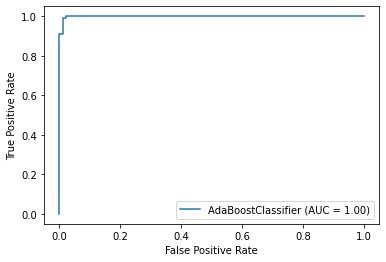

In [49]:
# Avaliação final do modelo AdaBoost
from sklearn import metrics 
final_ab = AdaBoostClassifier(n_estimators=300)
final_ab.fit(X_train, y_train)
y_ab = final_ab.predict(X_test)
print(f'Precisão AdaBoost: {metrics.precision_score(y_test, y_ab)}\nRevocação AdaBoost: {metrics.recall_score(y_test, y_ab)}\n')
print(f'Matriz de Confusão AdaBoost: \n {pd.DataFrame(metrics.confusion_matrix(y_test, y_ab))}')
metrics.plot_roc_curve(final_ab, X_test, y_test)

In [53]:
# Taxa de Erro
acerto = metrics. accuracy_score (y_test, y_ab)
erro_simples = 1 - acerto
print('Erro Simples do AdaBoost: {:.2f}%'.format(erro_simples * 100))

Erro Simples do AdaBoost: 1.39%
